In [1]:
%matplotlib inline

import pandas as pd

In [23]:
path = 'plotshort_K8462852.db'
path = 'fullshort_K8462852.db'
df = pd.read_csv(path, delimiter='\t', skiprows=range(5) + [6])
df[:5]

,Date,year,magcal_magdep,magcal_local_rms,limiting_mag_local,ra,dec,THETA_J2000,ELLIPTICITY,Plate,versionId,AFLAGS,timeAccuracy
0,2411313.525236,1889.849384,11.91,0.31,12.91,301.56502,44.45708,-87.3,0.511,i00083,96,0,0.0007
1,2411640.532201,1890.745294,11.56,0.49,12.59,301.56445,44.45697,-51.5,0.446,i01889,96,33554432,0.0007
2,2411640.603185,1890.745488,12.31,0.25,13.13,301.56429,44.45796,41.3,0.181,i01893,96,69206016,0.0007
3,2411682.462369,1890.860171,0.00,0.00,11.76,0.00000,0.00000,0.0,0.000,i02227,96,0,-1.0000
4,2411692.454482,1890.887547,11.51,3.02,12.36,301.56575,44.45693,-22.6,0.367,i02302,96,369137664,0.0007


919
858
640
640


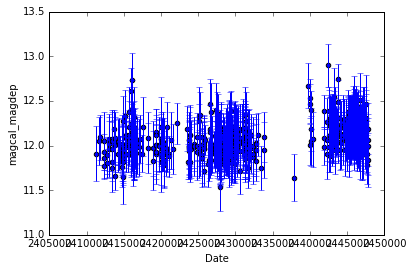

In [21]:
print len(df)
df = df[df.AFLAGS <= 9000]
print len(df)
df = df[df.magcal_local_rms <= 0.33]
print len(df)
df = df[df.magcal_magdep > df.magcal_local_rms + 0.2]
print len(df)
df.plot(kind='scatter', x='Date', y='magcal_magdep', yerr='magcal_local_rms')